# Exploratory Data Analysis & Intro

## Roles to Explore

In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for US Data Analyst Roles

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

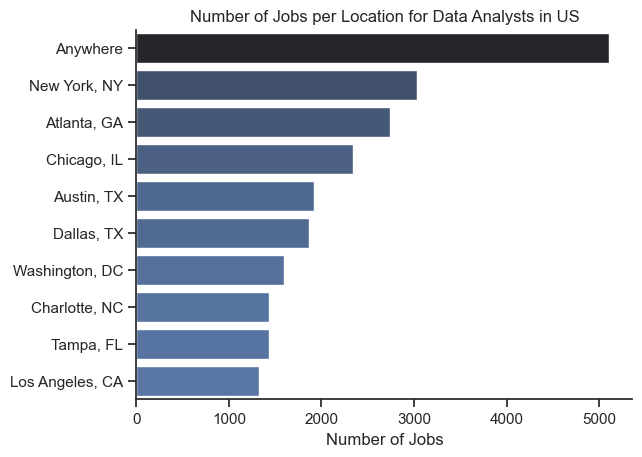

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Number of Jobs per Location for Data Analysts in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

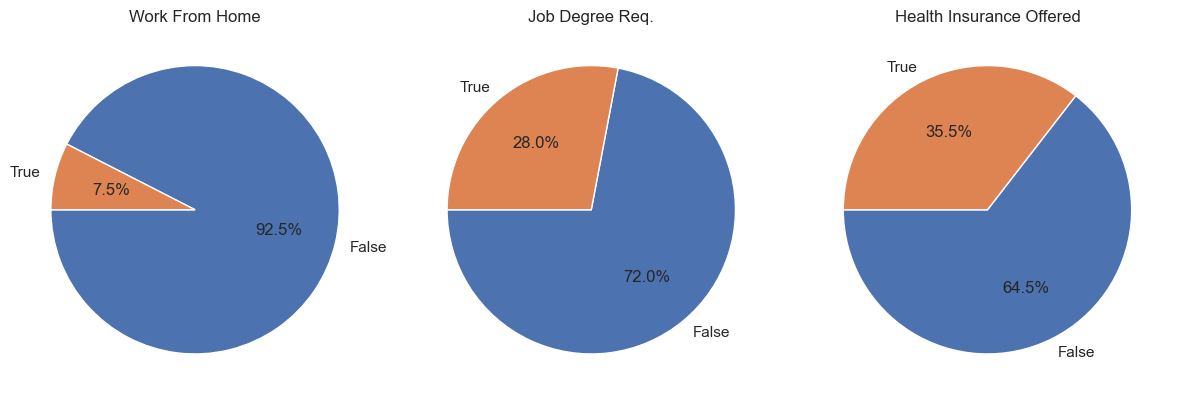

In [4]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle = 180, autopct = '%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

fig.tight_layout()

plt.show()

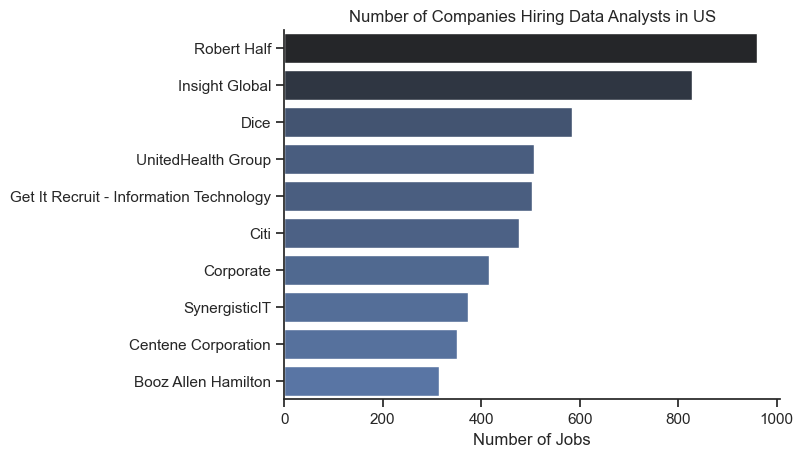

In [5]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Number of Companies Hiring Data Analysts in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Goal

1. Investigate top-paying roles and skills in data science industry.
2. Use Python to explore real-live dataset on job postings.
3. Use insights to help find best job opportunities.

## Final Deliverables

* Create Jupyter Notebookss (show core Python skills).
* Create summary page via [README.md]('3_Project/README.md) to record findings.
* Share project on GitHub and LinkedIn.